In [32]:
import requests
import pandas as pd
from datetime import datetime
URL = "https://ghostbusterschi.glitch.me/data"

In [33]:
query = {
    "$limit": 50
}
sample = requests.get(URL, params=query).json()
len(sample)

50

In [34]:
df = pd.DataFrame(sample)
df.head(5)

,community_area,completion_date,creation_date,current_activity,how_many_days_has_the_vehicle_been_reported_as_parked_,latitude,license_plate,location,longitude,most_recent_action,...,ssa,status,street_address,type_of_service_request,vehicle_color,vehicle_make_model,ward,x_coordinate,y_coordinate,zip_code
0,7,2017-08-04T00:00:00.000,2017-06-30T00:00:00.000,Place 7 Day Sticker,20,41.91454959893707,S341927,"{'type': 'Point', 'coordinates': [-87.64127602...",-87.64127602844653,Inspected and 7 day sticker applied to vehicle,...,NaN,Completed,503 W MENOMONEE ST,Abandoned Vehicle Complaint,Black,Mazda,43,1172618.20956831,1912251.8167839,60614
1,66,2017-08-04T00:00:00.000,2017-07-21T00:00:00.000,Place 7 Day Sticker,12,41.76003275473601,353T018,"{'type': 'Point', 'coordinates': [-87.68448579...",-87.68448579833664,Inspected and 7 day sticker applied to vehicle,...,14,Completed,7332 S ARTESIAN AVE,Abandoned Vehicle Complaint,Brown,Saab,18,1161312.14917611,1855964.0908773,60629
2,2,2017-08-04T00:00:00.000,2017-08-03T00:00:00.000,NaN,30,42.0073172627381,Q205423,"{'type': 'Point', 'coordinates': [-87.68614241...",-87.68614241777166,NaN,...,NaN,Completed - Dup,6932 N BELL AVE,Abandoned Vehicle Complaint,Red,Ford,50,1160190.05299807,1945895.19638419,60645
3,71,2017-08-04T00:00:00.000,2017-07-05T00:00:00.000,Place 7 Day Sticker,30,41.741035774278195,Z828919,"{'type': 'Point', 'coordinates': [-87.64847709...",-87.64847709897579,Inspected and 7 day sticker applied to vehicle,...,NaN,Completed,8413 S MORGAN ST,Abandoned Vehicle Complaint,Gray,Mitsubishi,21,1171113.96209717,1849036.76917635,60620
4,38,2017-08-04T00:00:00.000,2017-07-27T00:00:00.000,FVI - Outcome,20,41.818084031484126,2N842,"{'type': 'Point', 'coordinates': [-87.62321527...",-87.62321527082305,Return to Owner - Vehicle,...,NaN,Completed,4206 S MICHIGAN AVE,Abandoned Vehicle Complaint,Silver,Land Rover,3,1177856.74582322,1877155.26779199,60653


In [35]:
df.iloc[:, [4]].describe()

,how_many_days_has_the_vehicle_been_reported_as_parked_
count,38
unique,17
top,20
freq,9


In [36]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# https://matplotlib.org/basemap/api/basemap_api.html

/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


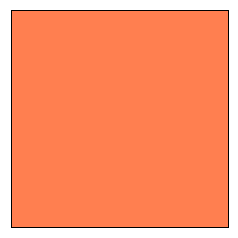

In [37]:
my_map = Basemap(projection='lcc', lat_0=41.835703, lon_0=-87.62838745,
    resolution = 'l', area_thresh = 0.1,
    width=500, height=500)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)
 
'''labels = ['Sitka', 'Baranof\n  Warm Springs', 'Port Alexander']
x_offsets = [10000, -20000, -25000]
y_offsets = [5000, -50000, -35000]

for label, xpt, ypt, x_offset, y_offset in zip(labels, x, y, x_offsets, y_offsets):
    plt.text(xpt+x_offset, ypt+y_offset, label)'''
 
plt.show()

In [41]:
near = requests.get(URL, params={
    "$select": "latitude, longitude",
    "$where": "within_circle(location, 41.835703, -87.628387, 500)",
    "$limit": 10
}).json()
pd.DataFrame(near).head(3)

,latitude,longitude
0,41.833540242537715,-87.62316170469188
1,41.83410402846557,-87.62317152282372
2,41.83459161085947,-87.6234135906318


/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


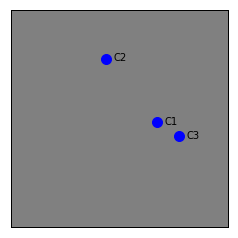

In [55]:
# setup Lambert Conformal basemap.
m = Basemap(lat_0=41.835703, lon_0=-87.62838745,
            width=1500, height=1500,
            projection='lcc', resolution='c')

m.drawcoastlines()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='gray',lake_color='aqua')

lats = [41.83546849399555, 41.83940226509764, 41.83459161085947]
lons = [-87.62522629211682, -87.62951600008769, -87.6234135906318]

x,y = m(lons, lats)
m.plot(x, y, 'bo', markersize=10)
 
labels = ['C1', 'C2', 'C3']
x_offset = 50
y_offset = -10

for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+x_offset, ypt+y_offset, label)

plt.show()